### Library import

In [1]:
# basic library
import numpy as np
import pandas as pd

# models
from sklearn.tree import DecisionTreeClassifier

# custom modules
from utils import set_seed, get_clf_eval, make_submission
import preprocessing as pp

### Global Setting

In [2]:
set_seed()

### Data preprocessing

In [3]:
tr_data, tt_data = pp.load_data()
tr_data, tt_data = pp.label_encoding(tr_data, tt_data)
x_tr, y_tr, x_val, y_val = pp.split_train_and_validation(tr_data)

In [4]:
# Check
print(f'number of original data: {len(tr_data)}')
print('-' * 20)
print(f'number of training data: {len(x_tr)}')
print(f'number of validation data: {len(x_val)}')
print(f'number of test data: {len(tt_data)}')

number of original data: 59299
--------------------
number of training data: 47439
number of validation data: 11860
number of test data: 5271


### Model Training

In [5]:
dtc = DecisionTreeClassifier()

In [6]:
dtc.fit(x_tr.fillna(0), y_tr)

DecisionTreeClassifier()

### Check Validation Score

In [7]:
y_pred = dtc.predict(x_val.fillna(0))

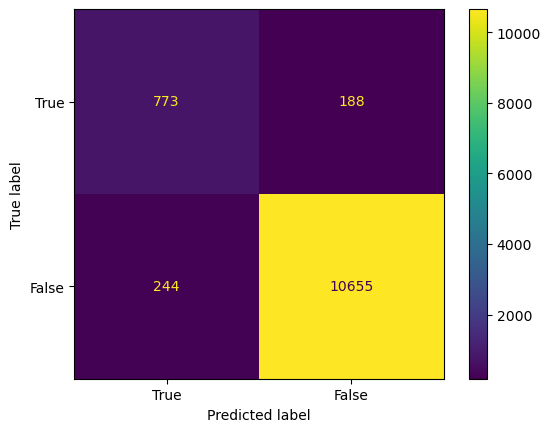


정확도: 0.9636
정밀도: 0.7601
재현율: 0.8044
F1: 0.7816


In [8]:
get_clf_eval(y_val, y_pred)

### Model Test

In [9]:
x_tt = tt_data.drop(['is_converted', 'id'], axis=1)

In [10]:
pred_tt = dtc.predict(x_tt.fillna(0))

### Make Submission File

In [11]:
make_submission(dir_name="01_Decision_Tree",
                f1_val=0.7816,
                y_pred=pred_tt)